## 1. Bajar la base de datos de Iris.

In [1]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [2]:
iris.data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [35]:
iris.data.max(axis=0)

sepal length (cm)    7.9
sepal width (cm)     4.4
petal length (cm)    6.9
petal width (cm)     2.5
dtype: float64

In [36]:
iris.data.min(axis=0)

sepal length (cm)    4.3
sepal width (cm)     2.0
petal length (cm)    1.0
petal width (cm)     0.1
dtype: float64

In [3]:
iris.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [4]:
#X = iris.data[["petal length (cm)", "petal width (cm)"]].values
X = iris.data
y = iris.target

#setosa_or_versicolor = (y == 0) | (y == 1)
#X = X[setosa_or_versicolor]
#y = y[setosa_or_versicolor]

## 2. Realiza una partición de datos para Train y Test con su respectiva etiqueta. (Recuerda que tu partición debe ser reproducible, es decir si ejecutas "n" veces esta instrucción debe arrojar las mismas particiones).


In [5]:
from sklearn.model_selection import train_test_split
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

## 3. Crea un pipeline que realice la transformación de los datos (como standard scale) para utilizar los modelos de SVM y Logistic Regression.  Para Decision Trees no es necesario aplicar un escalamiento en los datos.



In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

feature_transformation = Pipeline([('std_scaler', StandardScaler()),])

X_train_transformed = feature_transformation.fit_transform(X_train)

## 4. Guarda la transformación de los datos (pipeline) en un archivo .sav

In [7]:
from joblib import dump

dump(feature_transformation, 'feature_transformation.sav')

['feature_transformation.sav']

## 5.  Mediante un GridSearch  o RandomizedSearchCV  busca los mejores parámetros para los 3 tipos de modelos (SVM, LR, Decision Trees).



Support Vector Machine (SVM)

In [8]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid_SVC = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid_SVC.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.857 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.857 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.857 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.952 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.810 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.762 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.857 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.857 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.952 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.381 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [9]:
# print best parameter after tuning
print(grid_SVC.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid_SVC.best_estimator_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=100, gamma=0.001)


In [10]:
SVC_tunned = grid_SVC.best_estimator_

not tunned SVC

In [11]:
X_test_transformed = feature_transformation.fit_transform(X_test)
grid_SVC_predictions = grid_SVC.predict(X_test_transformed)
  
# print classification report
print(classification_report(y_test, grid_SVC_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.89      1.00      0.94        17
           2       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression

param_grid = {'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

# Create the logistic regression model
logistic_regression = LogisticRegression()

# Create the grid search object
grid_LR = GridSearchCV(logistic_regression, param_grid, cv=5)

# fitting the model for grid search
grid_LR.fit(X_train_transformed, y_train)

C:\Users\lopez\anaconda3\envs\myMLEnv\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\lopez\anaconda3\envs\myMLEnv\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lopez\anaconda3\envs\myMLEnv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\lopez\anaconda3\envs\myMLEnv\lib\site-packages\sklearn\linear_model\_logistic.py", l

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2']})

In [13]:
# print best parameter after tuning
print(grid_LR.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid_LR.best_estimator_)

{'C': 10, 'penalty': 'l2'}
LogisticRegression(C=10)


In [14]:
LR_tunned = grid_LR.best_estimator_

Not Tunned Logistic Regresion

In [15]:
grid_LR_predictions = grid_LR.predict(X_test_transformed)
  
# print classification report
print(classification_report(y_test, grid_LR_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.89      1.00      0.94        17
           2       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



Decision Trees

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, make_scorer

# Define the decision tree classifier
dt = DecisionTreeClassifier()

# Define the grid search parameters
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [2, 4, 6, 8, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4, 6]}

# Define the scoring metric
scorer = make_scorer(accuracy_score)

# Perform grid search with cross-validation
grid_DT = GridSearchCV(dt, param_grid, scoring=scorer, cv=5)
grid_DT.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(accuracy_score))

In [17]:
# print best parameter after tuning
print(grid_DT.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid_DT.best_estimator_)

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 5}
DecisionTreeClassifier(max_depth=4, min_samples_split=5)


In [18]:
DT_tunned = grid_DT.best_estimator_

Not Tunned Decision Trees

In [19]:
grid_DT_predictions = grid_DT.predict(X_test)
  
# print classification report
print(classification_report(y_test, grid_DT_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        17
           2       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



## 6. Una vez que ya identificaste los mejores modelos, utiliza estos para realizar tus predicciones  con los datos de Test.  Si tus modelos fueron entrenados con datos transformados (eje. standard scale), será necesario que tu conjunto de datos de test sea transformado.

tunned SVC

In [20]:
SVC_tunned_predictions = SVC_tunned.predict(X_test_transformed)

Tunned Logistic Regression

In [21]:
LR_tunned_predictions = LR_tunned.predict(X_test_transformed)

Tunned Desicion Trees

In [22]:
DT_tunned_predictions = DT_tunned.predict(X_test)

## 7.  Obtén su accuracy, recall y precision, F1 score, confusion matrix y reporte de clasificación (classification_report).

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics for each classifier
dt_accuracy = accuracy_score(y_test, DT_tunned_predictions)
dt_precision = precision_score(y_test, DT_tunned_predictions, average='macro')
dt_recall = recall_score(y_test, DT_tunned_predictions, average='macro')
dt_f1 = f1_score(y_test, DT_tunned_predictions, average='macro')

lr_accuracy = accuracy_score(y_test, LR_tunned_predictions)
lr_precision = precision_score(y_test, LR_tunned_predictions, average='macro')
lr_recall = recall_score(y_test, LR_tunned_predictions, average='macro')
lr_f1 = f1_score(y_test, LR_tunned_predictions, average='macro')

svm_accuracy = accuracy_score(y_test, SVC_tunned_predictions)
svm_precision = precision_score(y_test, SVC_tunned_predictions, average='macro')
svm_recall = recall_score(y_test, SVC_tunned_predictions, average='macro')
svm_f1 = f1_score(y_test, SVC_tunned_predictions, average='macro')

# Print out the metrics
print("Decision Tree Accuracy: ", dt_accuracy)
print("Decision Tree Precision: ", dt_precision)
print("Decision Tree Recall: ", dt_recall)
print("Decision Tree F1 Score: ", dt_f1)

print("Logistic Regression Accuracy: ", lr_accuracy)
print("Logistic Regression Precision: ", lr_precision)
print("Logistic Regression Recall: ", lr_recall)
print("Logistic Regression F1 Score: ", lr_f1)

print("Support Vector Machine Accuracy: ", svm_accuracy)
print("Support Vector Machine Precision: ", svm_precision)
print("Support Vector Machine Recall: ", svm_recall)
print("Support Vector Machine F1 Score: ", svm_f1)

Decision Tree Accuracy:  0.9777777777777777
Decision Tree Precision:  0.9791666666666666
Decision Tree Recall:  0.9803921568627452
Decision Tree F1 Score:  0.9791463017269469
Logistic Regression Accuracy:  0.9555555555555556
Logistic Regression Precision:  0.9649122807017544
Logistic Regression Recall:  0.9555555555555556
Logistic Regression F1 Score:  0.9576719576719577
Support Vector Machine Accuracy:  0.9555555555555556
Support Vector Machine Precision:  0.9649122807017544
Support Vector Machine Recall:  0.9555555555555556
Support Vector Machine F1 Score:  0.9576719576719577


Printing Classification Reports

In [24]:
# print classification report for Support Vector Machine
print(classification_report(y_test, SVC_tunned_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.89      1.00      0.94        17
           2       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [25]:
 # print classification report for Logistic Regression
print(classification_report(y_test, LR_tunned_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.89      1.00      0.94        17
           2       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [26]:
# print classification report for Decision Trees
print(classification_report(y_test, DT_tunned_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        17
           2       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



Printing Confusion Matrix

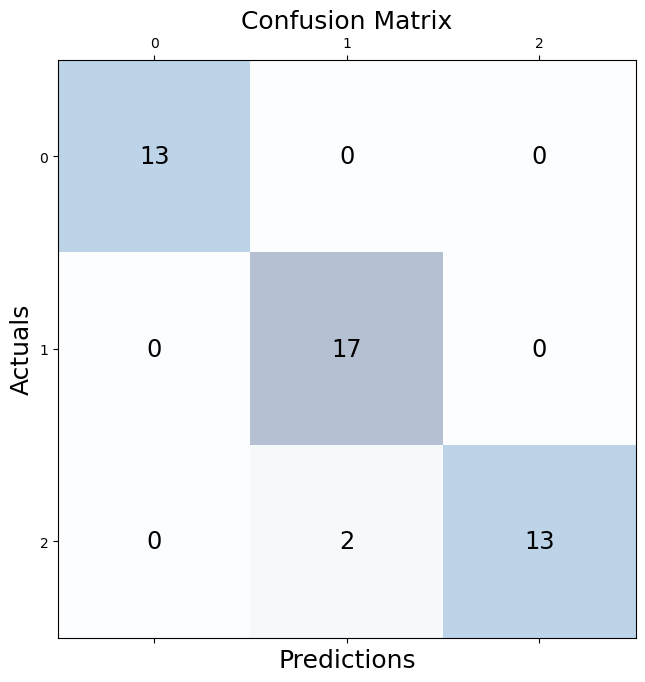

In [27]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Calculate the confusion matrix for SVC
SVC_CM = confusion_matrix(y_test, SVC_tunned_predictions)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(SVC_CM, cmap=plt.cm.Blues, alpha=0.3)
for i in range(SVC_CM.shape[0]):
    for j in range(SVC_CM.shape[1]):
        ax.text(x=j, y=i,s=SVC_CM[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

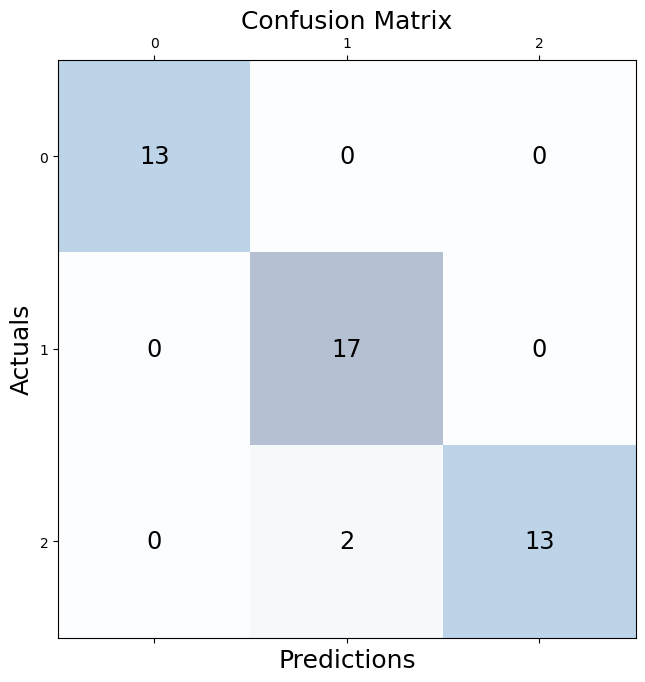

In [28]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Calculate the confusion matrix for Logistic Regression
LR_CM = confusion_matrix(y_test, LR_tunned_predictions)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(LR_CM, cmap=plt.cm.Blues, alpha=0.3)
for i in range(LR_CM.shape[0]):
    for j in range(LR_CM.shape[1]):
        ax.text(x=j, y=i,s=LR_CM[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

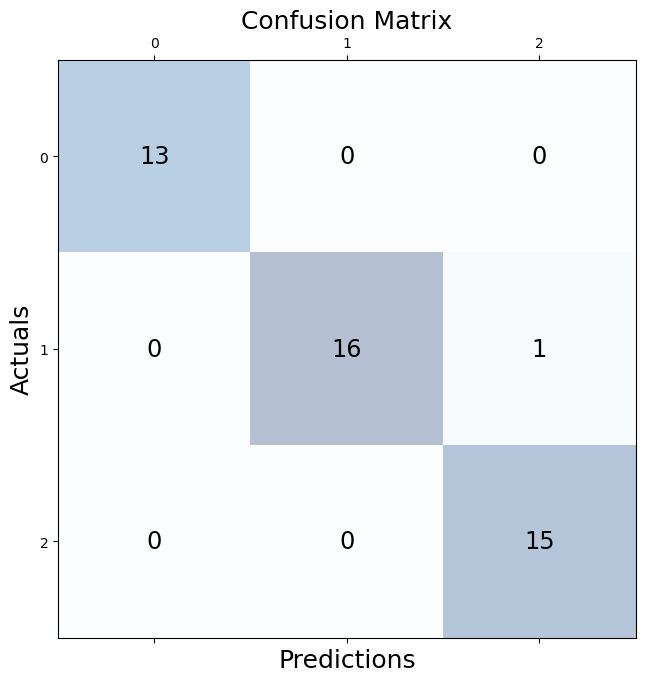

In [29]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Calculate the confusion matrix for Logistic Regression
DT_CM = confusion_matrix(y_test, DT_tunned_predictions)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(DT_CM, cmap=plt.cm.Blues, alpha=0.3)
for i in range(DT_CM.shape[0]):
    for j in range(DT_CM.shape[1]):
        ax.text(x=j, y=i,s=DT_CM[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## 8. Almacena tus modelos entrenados en un archivo .sav.

In [30]:
#Saving SVC tunned to pipeline
from joblib import dump

dump(SVC_tunned, 'SVC_tunned.sav')

['SVC_tunned.sav']

In [31]:
#Saving SVC tunned to pipeline
from joblib import dump

dump(LR_tunned, 'LR_tunned.sav')

['LR_tunned.sav']

In [32]:
#Saving SVC tunned to pipeline
from joblib import dump

dump(DT_tunned, 'DT_tunned.sav')

['DT_tunned.sav']

## 9. Implementa la estrategia de Voting Classifiers creando un ensamble con 3 modelos, para esta implementación vas a tener que definir nuevos clasificadores, no los que ya creaste para que puedas entrenarlos nuevamente bajo esta estrategia. NO SELECCIONES LOS MEJORES ESTIMADORES QUE ENCONTRASTE CON EL GRID_SEARCH (esto con la finalidad de evidenciar que clasificadores que no son tan buenos dentro de un ensamble pueden hacer una mejor predicción que un solo  clasificador que tiene buen desempeño) . Si estas considerando utilizar SVM recuerda que requiere datos escalados por lo cuál debes considerar el proceso de transformación de los datos aplicará para todos los modelos que utilizaste en el ensamble. (Puedes considerar incluir un modelo de Random Forest para este punto en vez de un árbol de decisión.)

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Define the classifiers
svc = make_pipeline(StandardScaler(), SVC())
rfc = RandomForestClassifier()
lr = make_pipeline(StandardScaler(), LogisticRegression())

# Define the voting classifier
voting_clf = VotingClassifier(estimators=[('svc', svc), ('rfc', rfc), ('lr', lr)], voting='hard')

# Train the voting classifier
voting_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = voting_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print out the accuracy
print("Voting Classifier Accuracy: ", accuracy)

# Print out the classification report
print("Classification Report: ")
print(classification_report(y_test, y_pred))


Voting Classifier Accuracy:  0.9777777777777777
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        17
           2       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [34]:
#Saving SVC tunned to pipeline
from joblib import dump

dump(voting_clf, 'voting_clf.sav')

['voting_clf.sav']